In [ ]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sdmetrics.single_column import KSComplement
from sdmetrics.column_pairs import CorrelationSimilarity
from ForestDiffusion import ForestDiffusionModel

from data import load_amp, load_uke, GENERATIVE_COLUMNS

X_amp, scores = load_amp("../data/updrs_amp_all.csv")
X_amp[GENERATIVE_COLUMNS]

,UPDRS I,UPDRS II,UPDRS III,UPDRS IV,PDQ,MoCA
0,17.307692,21.153846,11.363636,37.500000,<NA>,96.666667
1,15.384615,21.153846,9.090909,16.666667,<NA>,100.000000
2,19.230769,21.153846,25.000000,25.000000,<NA>,93.333333
3,17.307692,26.923077,22.727273,0.000000,<NA>,83.333333
4,7.692308,5.769231,13.636364,25.000000,<NA>,96.666667
...,...,...,...,...,...,...
13163,3.846154,3.846154,12.878788,NaN,<NA>,NaN
13164,0.000000,1.923077,12.878788,NaN,<NA>,NaN
13165,5.769231,1.923077,11.363636,NaN,<NA>,NaN
13166,1.923077,3.846154,6.818182,NaN,<NA>,90.000000


In [2]:
x_uke, covariates_uke, y_uke = load_uke(
    "/workspaces/de.uke.iam.parkinson.vae_longitudinal/data/pdq_uke_new.csv"
)

valid_measurements = (~pd.isna(x_uke["PDQ"])) & (~pd.isna(y_uke["PDQ"]))
x_uke = x_uke[valid_measurements]
covariates_uke = covariates_uke[valid_measurements]
y_uke = y_uke[valid_measurements]

x_uke

,UPDRS I,UPDRS II,UPDRS III,UPDRS IV,PDQ,MoCA
0,7.692308,21.153846,18.181818,41.666667,12.656250,NaN
1,13.461538,19.230769,32.575758,0.000000,5.468750,96.666667
2,17.307692,25.000000,19.696970,16.666667,28.906250,80.000000
4,5.769231,38.461538,22.727273,58.333333,16.562500,90.000000
5,13.461538,28.846154,27.272727,41.666667,30.416667,93.333333
6,26.923077,55.769231,28.787879,45.833333,50.052083,100.000000
7,13.461538,3.846154,22.727273,45.833333,14.114583,90.000000
8,15.384615,25.000000,14.393939,45.833333,28.854167,86.666667
9,17.307692,25.000000,34.090909,NaN,11.041667,90.000000
10,26.923077,28.846154,18.939394,41.666667,35.781250,100.000000


## Train the model

In [3]:
x = X_amp[GENERATIVE_COLUMNS].copy()
x = x / 100 * 2 - 1
x = x.to_numpy()

forest_model = ForestDiffusionModel(
    x,
    n_t=50,
    duplicate_K=100,
    X_covs=scores,
    diffusion_type="flow",
    n_jobs=-1,
)

with open("forestdiffusion.pickle", "wb") as f:
    pickle.dump(forest_model, f)

In [4]:
with open("forestdiffusion.pickle", "rb") as f:
    forest_model = pickle.load(f)

In [6]:
validation_set = (X_amp["Study"] == "BioFIND") & (X_amp["Visit ID"] == "M0")

x_real = X_amp[validation_set][GENERATIVE_COLUMNS]
x_generated = pd.DataFrame(
    ((forest_model.generate(len(scores[validation_set]), X_covs=scores[validation_set].to_numpy()) + 1) / 2) * 100,
    columns=GENERATIVE_COLUMNS,
)

## Benchmark data

In [7]:
print(np.nanmean([KSComplement.compute(
    real_data=x_real[column],
    synthetic_data=x_generated[column]
) for column in GENERATIVE_COLUMNS]))

print(CorrelationSimilarity.compute(
    real_data=x_real,
    synthetic_data=x_generated
))

0.8711864406779661
0.9958559790836186


/usr/local/lib/python3.10/dist-packages/sdmetrics/single_column/statistical/kscomplement.py:68: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  statistic, _ = ks_2samp(real_data, synthetic_data)


## Generate some data

In [8]:
def generate_samples(model, x, x_covariates, n_samples: int = 50) -> pd.DataFrame:
    generated_samples = []
    for ((i, sample), (_, row)) in zip(x.iterrows(), x_covariates.iterrows()):
        covariates = np.repeat(row.to_numpy()[np.newaxis, :], n_samples, axis=0)
        prediction = pd.DataFrame(
            ((model.generate(len(covariates), X_covs=covariates) + 1) / 2) * 100,
            columns=x.columns,
        )

        for key, value in sample.items():
            if pd.isna(value):
                continue

            generated_samples.append(
                pd.DataFrame.from_dict(
                    {
                        "Prediction": prediction[key],
                        "Ground truth": value,
                        "Score": key,
                        "Subject": i,
                        "Sample ID": np.arange(n_samples),
                    }
                )
            )

    return pd.concat(generated_samples, ignore_index=True)


uke_samples = generate_samples(forest_model, x_uke, covariates_uke, n_samples=500)

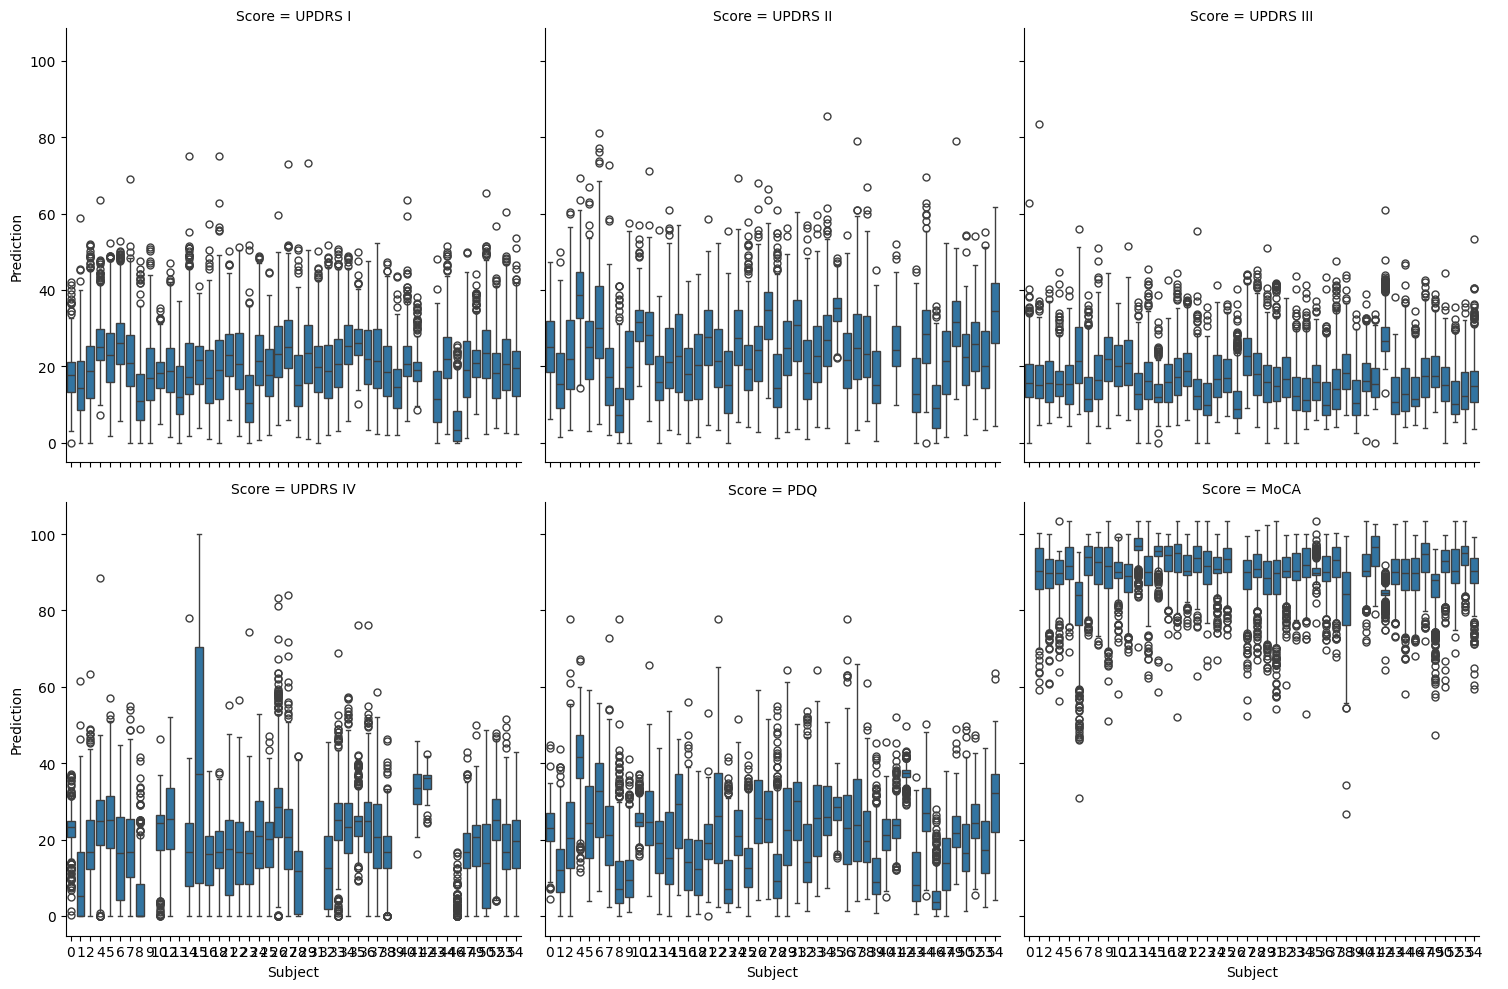

In [9]:
sns.catplot(
    data=uke_samples, x="Subject", y="Prediction", col="Score", col_wrap=3, kind="box"
)

17.922530135659095
17.811079214804764


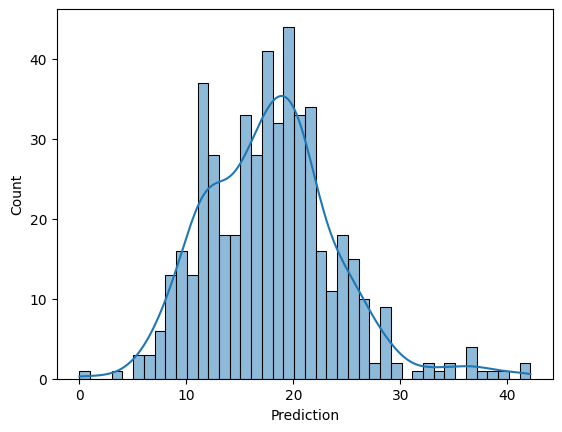

In [10]:
selection = uke_samples[(uke_samples["Score"] == "UPDRS I") & (uke_samples["Subject"] == 0)]

sns.histplot(selection, x="Prediction", binwidth=1, kde=True)
print(selection["Prediction"].mean())
print(selection["Prediction"].median())

In [11]:
z_scores = []
for subject, data in uke_samples.groupby("Subject"):
    for score, score_data in data.groupby("Score"):
        mean = score_data["Prediction"].median()
        std = score_data["Prediction"].std()
        #mean = score_data["Prediction"].median()
        #std = (score_data["Prediction"] - mean).abs().median() + 1e-6
        
        ground_truth = score_data["Ground truth"].iloc[0]
        ground_truth_score = (ground_truth - mean) / std
        z_scores.append((subject, score, ground_truth_score))

z_scores = (
    pd.DataFrame.from_records(z_scores, columns=["Subject", "Score", "Z-Score"])
    .pivot(index="Subject", columns="Score", values="Z-Score")
    .reset_index()
    .set_index("Subject")
)
z_scores["Label"] = (x_uke["PDQ"] - y_uke["PDQ"]) > 4.72

z_scores

Score,MoCA,PDQ,UPDRS I,UPDRS II,UPDRS III,UPDRS IV,Label
Subject,,,,,,,
0,NaN,-1.770388,-1.644715,-0.461917,0.379292,3.633025,False
1,0.854926,-0.795623,-0.093197,0.429064,2.435015,-0.446621,False
2,-1.592321,0.713970,-0.131400,0.289460,0.541131,-0.003908,False
4,0.046954,-2.819556,-2.522812,-0.017768,1.334735,3.648829,False
5,0.316681,0.497687,-0.942668,0.325390,1.705000,1.550374,True
6,1.531796,1.478045,0.077858,1.713104,0.768254,2.357643,True
7,-0.679782,-0.605166,-0.724468,-1.296847,1.640086,2.465772,True
8,-0.936314,2.230376,0.465810,2.065549,-0.259138,5.505979,True
9,-0.187559,0.242865,0.036484,0.438846,1.515306,NaN,False


0.6153846153846154


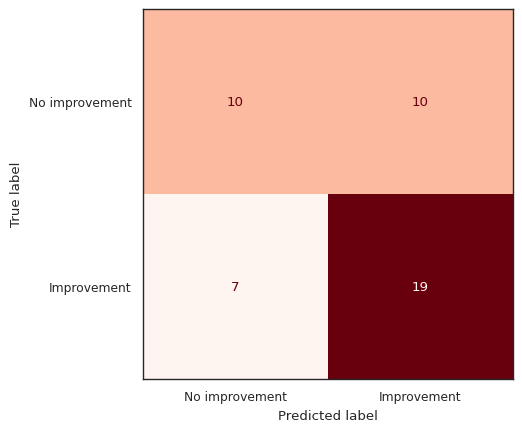

In [12]:
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_predict, LeaveOneOut
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, roc_auc_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# cv = StratifiedKFold(10, random_state=42, shuffle=True)
cv = LeaveOneOut()
# x = pd.concat([z_scores.drop(columns=["Label"])], axis=1)
x = z_scores.drop(columns=["Label"]).round(2)
# x = z_scores.drop(columns=["Label"]).round(2).fillna(0)
y_pred = cross_val_predict(
    HistGradientBoostingClassifier(min_samples_leaf=5, max_depth=3),
    # LogisticRegression(max_iter=1000),
    # KNeighborsClassifier(n_neighbors=3),
    x,
    z_scores["Label"],
    cv=cv,
)

with sns.axes_style("white"):
    sns.set_context("paper")
    ConfusionMatrixDisplay.from_predictions(z_scores["Label"], y_pred, cmap="Reds", colorbar=False, display_labels=["No improvement", "Improvement"])

print(roc_auc_score(z_scores["Label"], y_pred))

In [13]:
x = pd.concat([z_scores.drop(columns=["Label"])], axis=1)
y = (x_uke["PDQ"] - y_uke["PDQ"]) / (x_uke["PDQ"] + y_uke["PDQ"])
y_pred = cross_val_predict(
    HistGradientBoostingRegressor(min_samples_leaf=5, max_depth=3),
    x,
    y,
    cv=cv,
)

mean_squared_error(y, y_pred)

0.14175583668505706

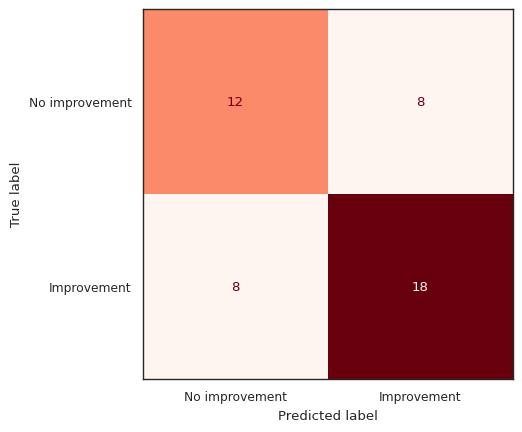

In [14]:
x = pd.concat([x_uke, covariates_uke], axis=1)
y = (x_uke["PDQ"] - y_uke["PDQ"]) > 4.72
y_pred = cross_val_predict(
    HistGradientBoostingClassifier(min_samples_leaf=5, max_depth=3),
    x,
    y,
    cv=cv,
)

with sns.axes_style("white"):
    sns.set_context("paper")
    ConfusionMatrixDisplay.from_predictions(y, y_pred, cmap="Reds", colorbar=False, display_labels=["No improvement", "Improvement"])

## Check correlations

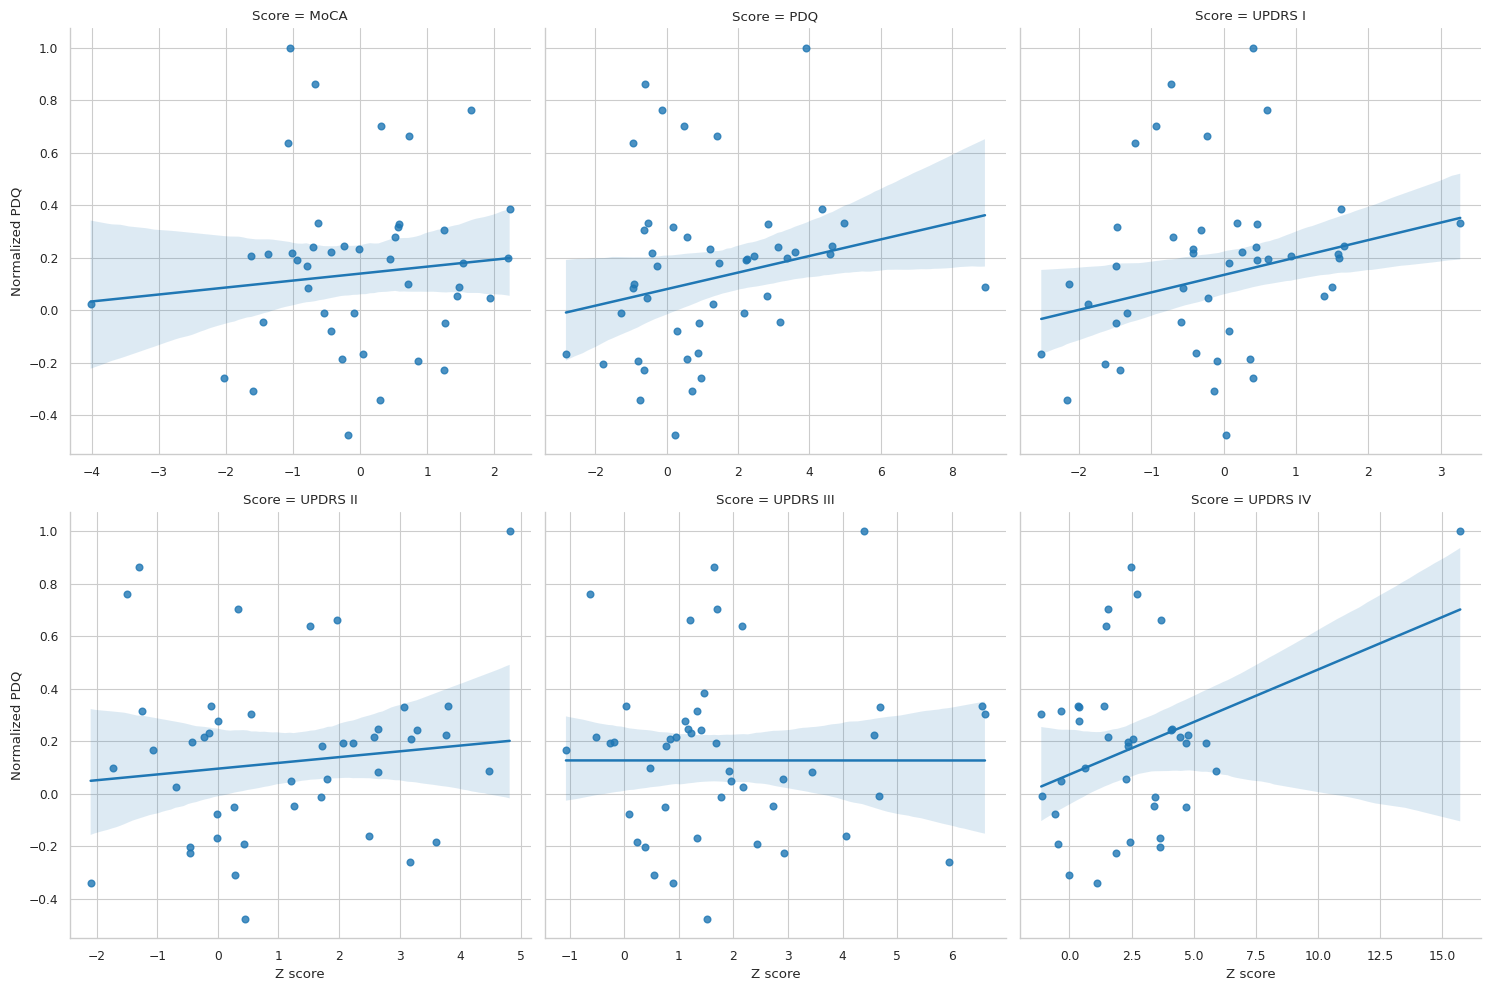

In [15]:
regscores = z_scores.copy()
regscores["Normalized PDQ"] = (x_uke["PDQ"] - y_uke["PDQ"]) / (x_uke["PDQ"] + y_uke["PDQ"])
regscores = regscores.reset_index().melt(id_vars=["Subject", "Label", "Normalized PDQ"], value_name="Z score")

with sns.axes_style("whitegrid"):
    sns.set_context("paper")
    
    sns.lmplot(
        data=regscores, x="Z score", y="Normalized PDQ", col="Score", col_wrap=3, facet_kws=dict(sharex=False, sharey=True), robust=True
    )

## Conditional average treatment effect

In [16]:
covariates_uke_with_surgery = covariates_uke.copy()
covariates_uke_with_surgery["Surgery"] = 1.0

uke_samples_simulated_with_surgery = generate_samples(
    forest_model, y_uke, covariates_uke_with_surgery, n_samples=200
)

In [17]:
simulation_joined = uke_samples_simulated_with_surgery.rename(
    columns={"Prediction": "Prediction (Post)", "Ground truth": "Ground truth (Post)"}
).set_index(["Subject", "Sample ID", "Score"]).join(
    uke_samples.set_index(["Subject", "Sample ID", "Score"])
).rename({"Prediction": "Prediction (Pre)", "Ground truth": "Ground truth (Pre)"}, axis=1)

simulation_joined["Estimated effect"] = simulation_joined["Prediction (Post)"] - simulation_joined["Prediction (Pre)"]
simulation_joined["True effect"] = simulation_joined["Ground truth (Post)"] - simulation_joined["Ground truth (Pre)"]

simulation_joined = simulation_joined.reset_index()
simulation_joined

,Subject,Sample ID,Score,Prediction (Post),Ground truth (Post),Prediction (Pre),Ground truth (Pre),Estimated effect,True effect
0,0,0,UPDRS I,28.417736,21.153846,30.044420,7.692308,-1.626684,13.461538
1,0,1,UPDRS I,20.142979,21.153846,32.743159,7.692308,-12.600180,13.461538
2,0,2,UPDRS I,21.316596,21.153846,22.144328,7.692308,-0.827731,13.461538
3,0,3,UPDRS I,28.024553,21.153846,24.669574,7.692308,3.354980,13.461538
4,0,4,UPDRS I,20.757001,21.153846,16.847102,7.692308,3.909899,13.461538
...,...,...,...,...,...,...,...,...,...
55195,54,195,MoCA,87.786590,100.000000,94.782674,100.000000,-6.996083,0.000000
55196,54,196,MoCA,88.513652,100.000000,94.203928,100.000000,-5.690276,0.000000
55197,54,197,MoCA,86.393020,100.000000,93.361454,100.000000,-6.968435,0.000000
55198,54,198,MoCA,84.342048,100.000000,93.212116,100.000000,-8.870069,0.000000


TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

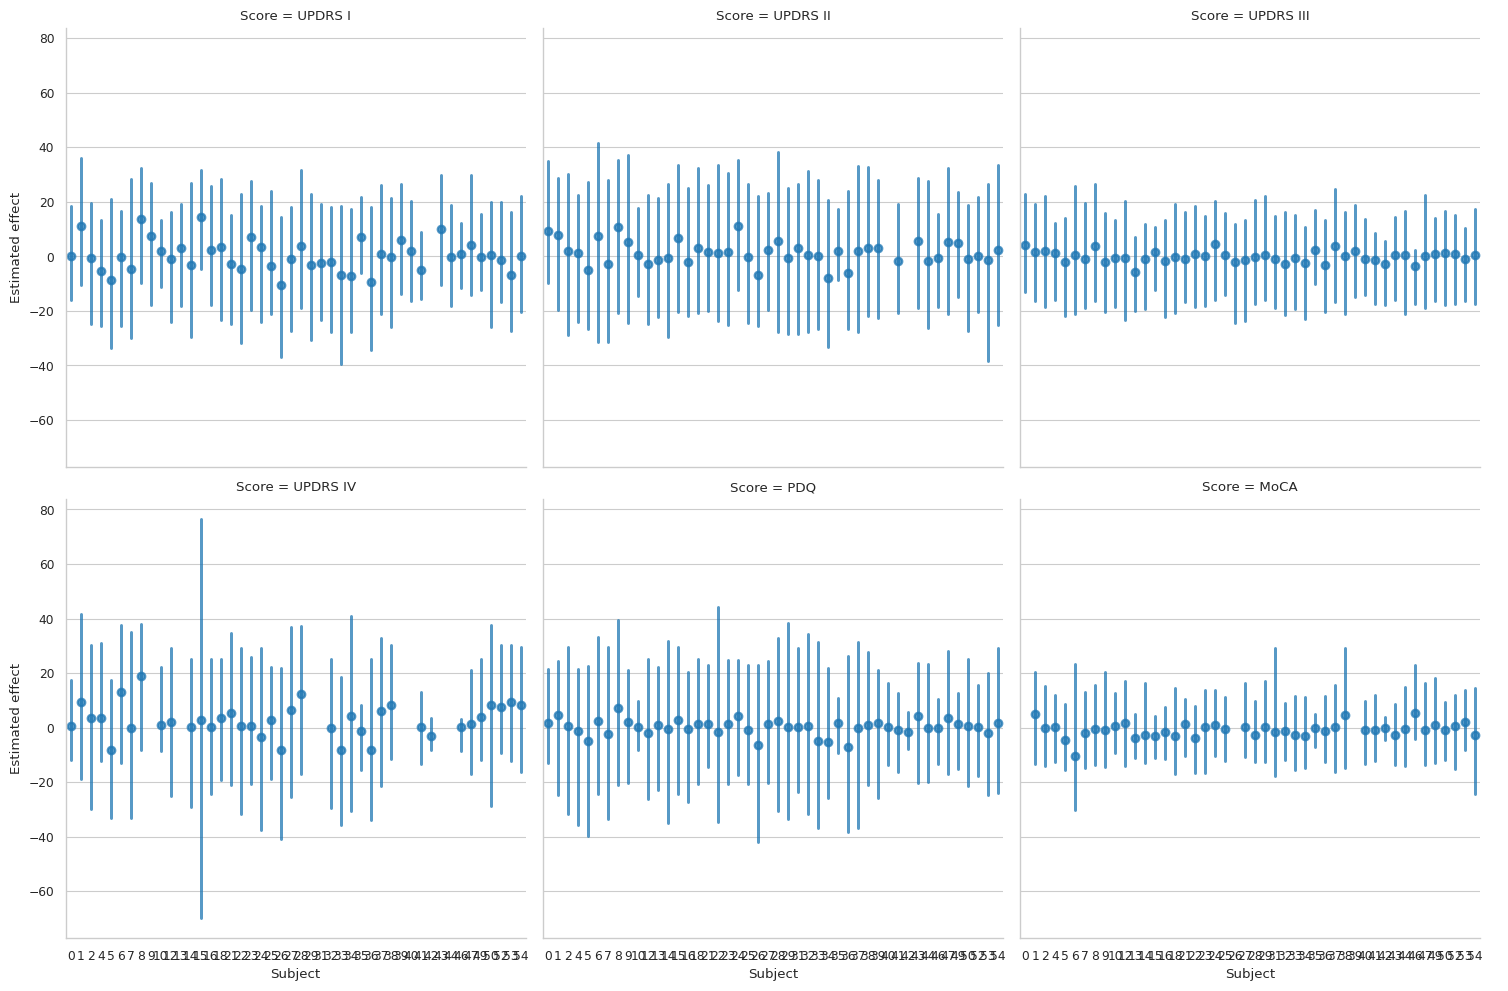

In [ ]:
def hdi(ary, hdi_prob=0.95, skipna=False):
    """Compute hpi over the flattened array."""
    if isinstance(ary, pd.Series):
        ary = ary.to_numpy()
    ary = ary.flatten()
    if skipna:
        nans = np.isnan(ary)
        if not nans.all():
            ary = ary[~nans]
    n = len(ary)
    ary = np.sort(ary)
    interval_idx_inc = int(np.floor(hdi_prob * n))
    n_intervals = n - interval_idx_inc
    interval_width = np.subtract(
        ary[interval_idx_inc:], ary[:n_intervals], dtype=np.float64
    )

    if len(interval_width) == 0:
        raise ValueError("Too few elements for interval calculation. ")

    min_idx = np.argmin(interval_width)
    hdi_min = ary[min_idx]
    hdi_max = ary[min_idx + interval_idx_inc]

    return hdi_min, hdi_max

def annotate(data, **kws):
    ax = plt.gca()
    sns.scatterplot(data=data.groupby("Subject")["True effect"].mean(), x="Subject", y="True effect", ax=ax, color="r")
    #data.groupby("Subject")["True effect"].mean().plot(ax=ax, marker="*", color="r", markersize=5, alpha=0.75)
    
with sns.axes_style("whitegrid"):
    sns.set_context("paper")
    grid = sns.catplot(
        data=simulation_joined,
        x="Subject",
        y="Estimated effect",
        #hue="Clinical meaningful improvement",
        errorbar=hdi,
        estimator=np.median,
        linestyles="none",
        alpha=0.75,
        #order=subject_order,
        col="Score",
        col_wrap=3,
        kind="point",
    )
    grid.map_dataframe(annotate)
    #grid.set_xlabels("")
    #grid.set_xticklabels([])
    grid.figure.show()

https://movementdisorders.onlinelibrary.wiley.com/doi/10.1002/mdc3.14229
https://movementdisorders.onlinelibrary.wiley.com/doi/10.1002/mdc3.14262


Estimated UPDRS after THS